# **Case Study on Regression**
The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data from the csv file

In [ ]:
df=pd.read_csv('/content/car_age_price.csv')

In [ ]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# **Studying the data**

In [ ]:
df.shape

(112, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


Data have 112 records withput any null values

In [ ]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# **Correlation study**

In [ ]:
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


Studying the distribution using the histograms

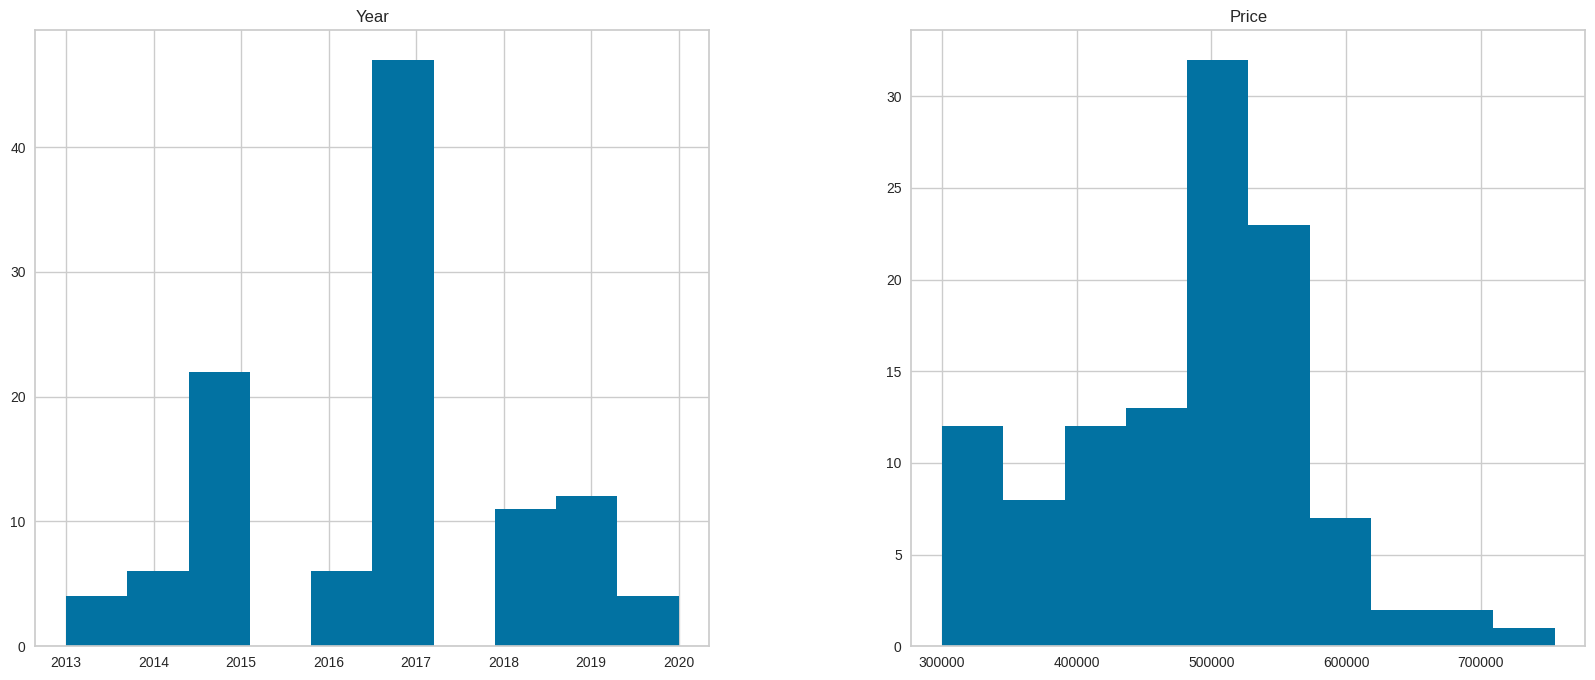

In [ ]:
freqgraph=df.select_dtypes(include='int64')
freqgraph.hist(figsize=(20,8))
plt.show()

Plotting the heat map showing the correlation

<Axes: >

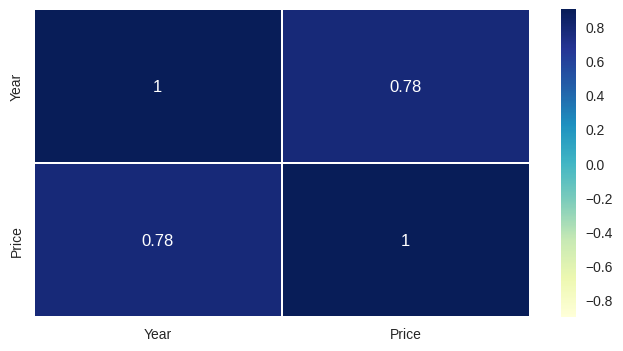

In [ ]:
cormatrix=df.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(cormatrix,vmin=-0.9,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

Price and Year  have a good correlation , with correlation coefficient of 78%

Plotting boxplot to see the distribution of data

<ipython-input-199-001fcbeed9c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year',y='Price',data=df,palette='hls')


<Axes: xlabel='Year', ylabel='Price'>

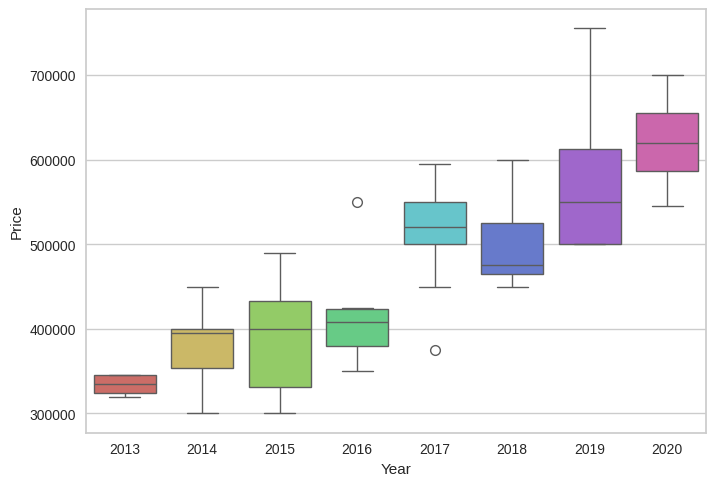

In [ ]:
sns.boxplot(x='Year',y='Price',data=df,palette='hls')

In [ ]:
x=df.drop(['Price'],axis=1)
y=df.Price

Transform data

In [ ]:
'''
scaler=StandardScaler()
x=scaler.fit_transform(x)

'''

'\nscaler=StandardScaler()\nx=scaler.fit_transform(x)\n\n'

Checking data size is sufficient

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


There 112 records for the predictor variable , so we have sufficient data

Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

### **Fitting the linear regression model**

In [ ]:
model=lr.fit(x_train,y_train)

Predicting the test data

In [ ]:
predictions=model.predict(x_test)
predictions

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

Model testing

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: ",mean_squared_error(y_test,predictions))

MSE is:  3878767151.073449


In [ ]:
from sklearn.metrics import r2_score
print('R2 score is :', r2_score(y_test,predictions))

R2 score is : 0.4347961632108023


R2 value should be close to one for a good model, here it is 0.4347 .So we can conclude model is not that much good. We may need to include more factors in to the analysis.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


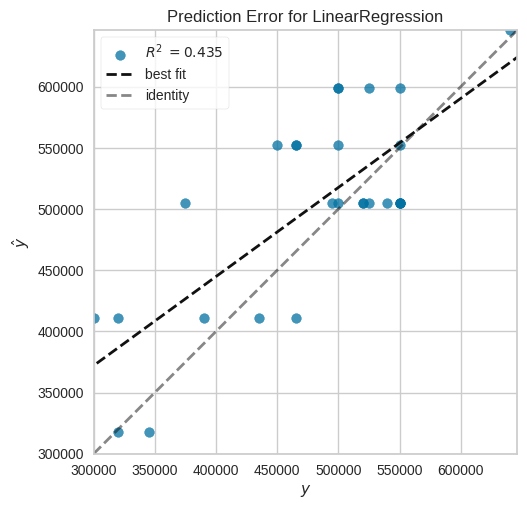

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
visualizer=PredictionError(model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


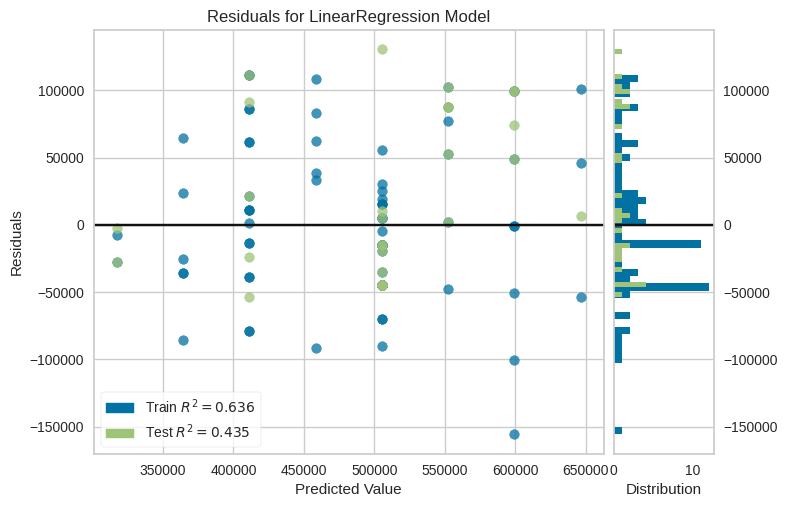

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer=ResidualsPlot(model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

Analysis
Create regression models
LASSO:Least Absolute Shrinkage and Selection Operator

## **Fitting the Lasso model**

In [ ]:
lasso=Lasso(alpha=0.001)
lasso_f=lasso.fit(x_train, y_train)

Lasso Prediction

In [ ]:
y_pred_lasso=np.round((lasso.predict(x_test))).astype(int)
y_pred_lasso


array([599223, 505265, 552244, 552244, 552244, 411307, 505265, 552244,
       599223, 599223, 317349, 505265, 411307, 646202, 552244, 599223,
       317349, 411307, 505265, 505265, 505265, 505265, 505265, 505265,
       505265, 505265, 411307, 411307])

Testing the Lasso model

In [ ]:
from sklearn.metrics import r2_score
print('R2 score is :', r2_score(y_test,y_pred_lasso))

R2 score is : 0.4347965841938489


In [ ]:
print("MSE is: ",mean_squared_error(y_test,y_pred_lasso))

MSE is:  3878764262.035714


R2 value should be close to one for a good model, here it is 0.4347 .So we can conclude model is not that much good. We may need to include more factors in to the analysis.

The model intercept

In [ ]:
lasso_f.intercept_

-94251408.30647737

The model coeffcients

In [ ]:
lasso_f.coef_

array([46979.01504634])

In [ ]:
#printing the r_squared
print('lasso Regression r2 on traing data',lasso_f.score(x_train,y_train))

lasso Regression r2 on traing data 0.63588110557104


In [ ]:
#R2 on the testing data
print('r-squared on testind data',lasso_f.score(x_test,y_test))

r-squared on testind data 0.43479616776531715


In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


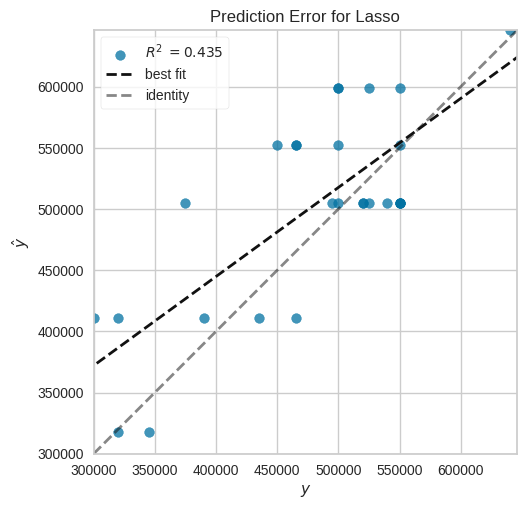

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
visualizer=PredictionError(lasso_f)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


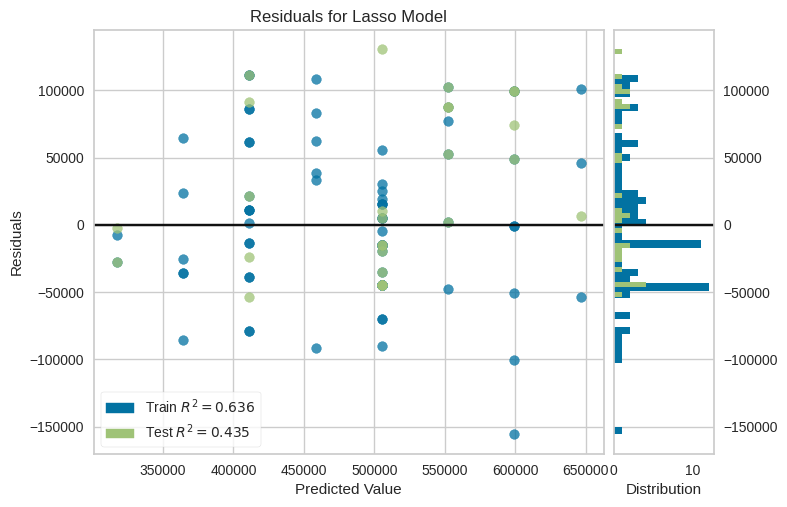

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer=ResidualsPlot(lasso_f)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()


# **conclusion**
From both the linear regression and Lasso Model the R2 value and r-squared value obtained are almost same. Both are modeling the data almost same manner. But both have low r2 value and high r-squred value, indicating a poor modelling.

### ***Can you predict the possible price of a 2022 model second-hand grand i10? ***

Can you predict the possible price of a 2022 model second-hand grand i10?

In [ ]:
#Prediciton using linear Regression
df_2022=np.array([2022]).reshape(1,-1)
predictions22=model.predict(df_2022)
predictions22

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([740160.11937766])

Price of car predicted for  2022 model second hand grand i10 is 740160.11937766

In [ ]:
#Prediciton using Lasso Model
df_2022=np.array([2022]).reshape(1,-1)
predictions22l=lasso_f.predict(df_2022)
predictions22l

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([740160.11721528])

Price of car predicted for 2022 model second hand grand i10 is 740160.11721528

Both the models predict the car  almost same  car price value